In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/spotify-2023.csv", encoding="ISO-8859-1")

In [7]:
df.head(5)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Column Info: Basic information about songs and their release, the spotify engine's "audio feature" ratings in different categories, and song chart presence and placement on four different platforms

In [8]:
df.isna().sum()


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Strange distribution of null values led me to believe that there were some null values not being recorded. I then realized it is becuase many songs had values assigned to 0 (as they never hit the charts) instead of NaN. 

In [9]:
#Finding all possible alternate nones and setting them to None
nones = [0, 'Na', 'nan', " "]
def fix_none(string):
    if string in nones:
        return None
    else:
        return string

df["in_apple_charts"] = df["in_apple_charts"].map(fix_none)

df["in_shazam_charts"] = df["in_shazam_charts"].map(fix_none)

df["in_spotify_charts"] = df["in_spotify_charts"].map(fix_none)


In [10]:
df.isna().sum()

track_name                0
artist(s)_name            0
artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts       405
streams                   0
in_apple_playlists        0
in_apple_charts         100
in_deezer_playlists       0
in_deezer_charts          0
in_shazam_charts         50
bpm                       0
key                      95
mode                      0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%            0
instrumentalness_%        0
liveness_%                0
speechiness_%             0
dtype: int64

The data now reflects songs that never hit the charts

In [11]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [12]:
df = df[['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

In [13]:
df["streams"].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

Looking at the unique values for streams, I realized that they were all in string form annd looking back at my df.info shazam rankings had the same issue

In [14]:
df["in_shazam_charts"].unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1,021', '1,281', nan, '187', '0', '1,173',
       '29', '150', '73', '139', '1,093', '96', '211', '325', '294',
       '197', '27', '310', '354', '184', '212', '81', '82', '100', '62',
       '69', '727', '311', '1,133', '102', '332', '259', '140', '16',
       '110', '810', '176', '615', '210', '216', '215', '167', '37',
       '171', '272', '529', '26', '5', '169', '230', '84', '154', '93',
       '115', '72', '8', '323', '49', '1,451', '1,170', '429', '162',
       '10', '478', '236', '200', '78', '266', '486', '204', '34', '202',
       '312', '32', '153', '519', '458', '48', '666', '14', '925', '88',
       '203', '44', '74', '638', '64', '71', '2', '3', '136', '148', '22',
       '368', '1', '189', '52', '9', '31', '66', '208', '28', '558',
       '195', '13', '60', '503', '56', '15', '454', '40', '285', '129',
       '58', '117', '47', '20', '30', '80', '263', '116', '57', '39',
  

In [15]:
#Remove incorrect entry
df = df.drop(df.loc[df["streams"] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'].index)

In order to properly continue my analysis, I had to cast the values into ints.

In [16]:
#Turning numerical values saved as strings into ints
def cast_to_int(string):
    if isinstance(string, str):
        if "," in string:
            #remove commas to allow strings to be casted
            string = str(string.replace(',',''))
        return int(string)
    else:
        return string #if its already an int


df["streams"] = df["streams"].map(cast_to_int)
df["in_shazam_charts"] = df["in_shazam_charts"].map(cast_to_int)

## EDA

<Axes: xlabel='streams', ylabel='Count'>

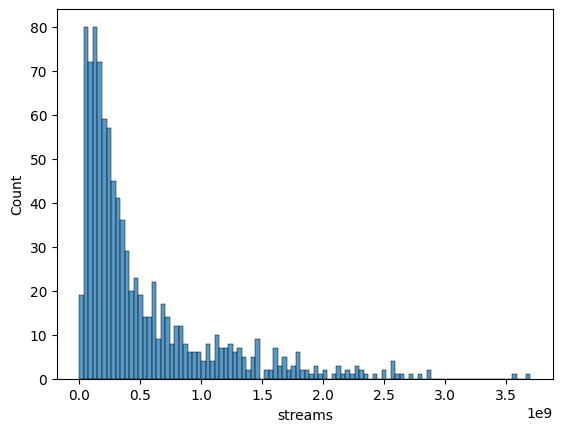

In [17]:
sns.histplot(data=df, x="streams", bins=100)

In [26]:
df["streams"].describe()

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64

Distribution for total amount of streams for songs on this list. Data is right skewed meaning the best measure of center would probably be the median which is 290 million streams. It seems that the most popular songs in a calander year are not necessariy the most popular ones of all time which makes sense due to the idea of music trends. There are a couple outliers over 3.5 billion. These must be songs that have been so popular that they have stayed most streamed for multiple years/ 

<Axes: xlabel='in_spotify_charts', ylabel='energy_%'>

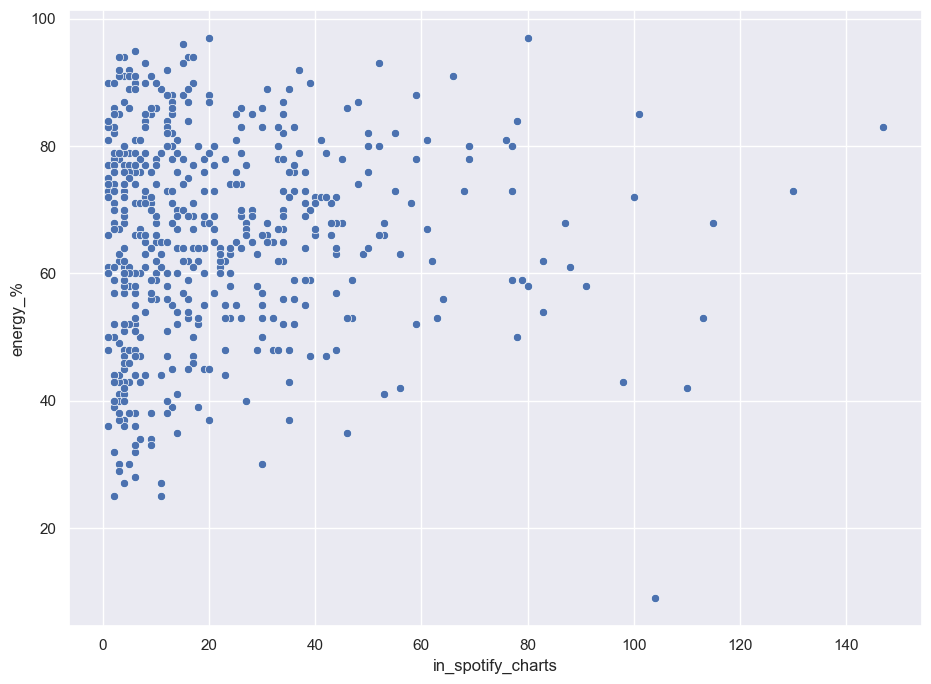

In [29]:
sns.scatterplot(data=df, x="in_spotify_charts", y="energy_%")

<Axes: xlabel='in_spotify_charts', ylabel='valence_%'>

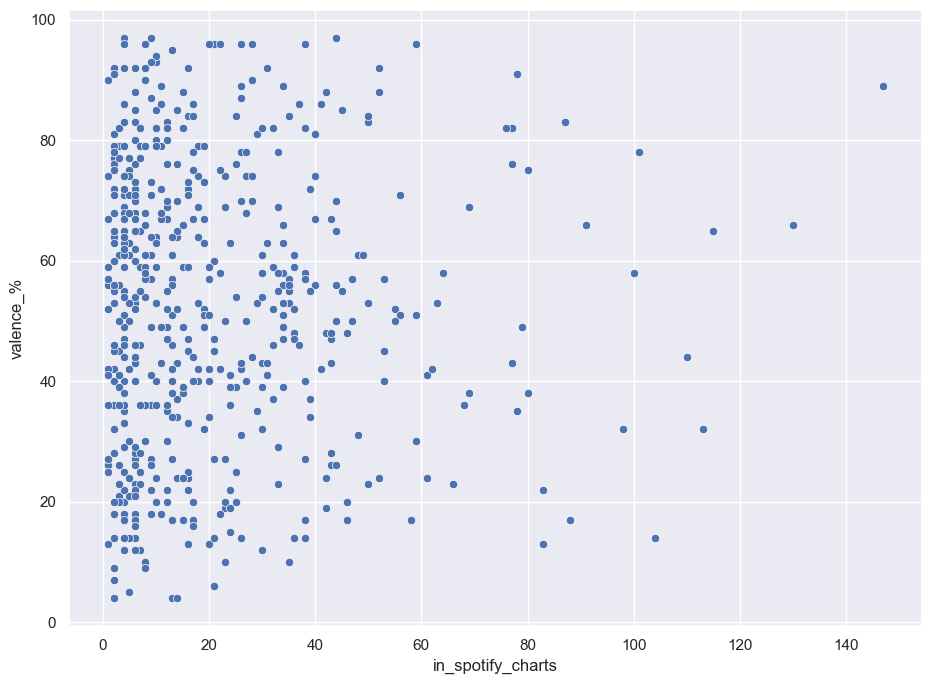

In [31]:
sns.scatterplot(data=df, x="in_spotify_charts", y="valence_%")

Comparing chart ranking to a couple of spotify's music characetrisitc, the distribution is too uniform to really conclude about any correlation. 

## Question 1: What audio feature is the most popular?

<Axes: >

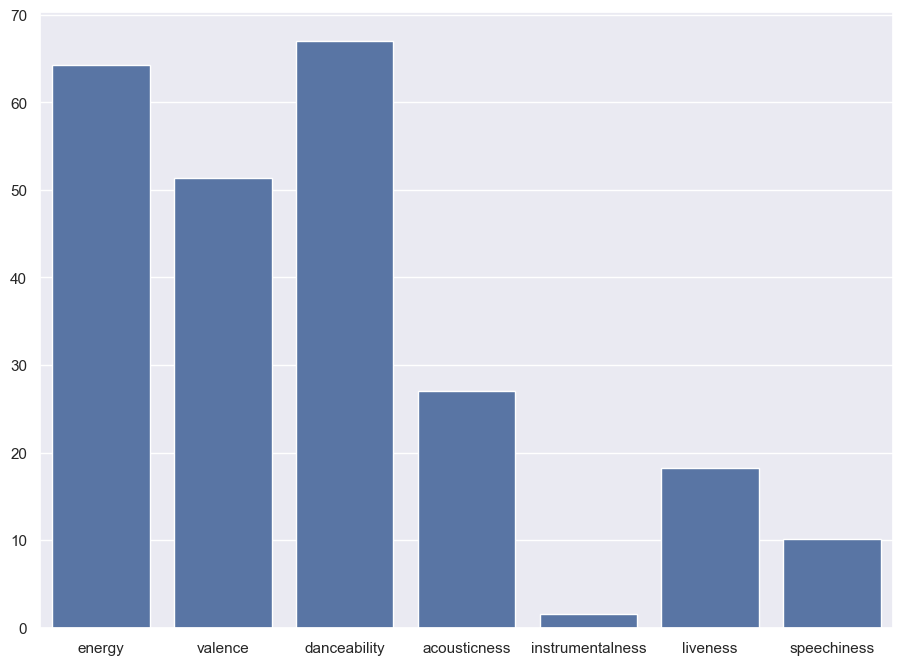

In [18]:
#Utilizing a dictionary to create a bar graph of the average rating in terms of audio feature ratings
my_dict = {"energy": df["energy_%"].mean(), "valence": df["valence_%"].mean(), "danceability": df["danceability_%"].mean(), "acousticness" : df["acousticness_%"].mean(), "instrumentalness": df["instrumentalness_%"].mean(), "liveness": df["liveness_%"].mean(), "speechiness": df["speechiness_%"].mean()}

keys = list(my_dict.keys())
vals = []
for k in keys:
    vals.append(my_dict[k])

sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x=keys, y=vals)

In [19]:
df["danceability_%"].mean()

66.98424369747899

Comparing the means of each audio feature, it seems that danceability is the most popular at an average of 67% danceabiity rating. 

<Axes: xlabel='danceability_%', ylabel='Count'>

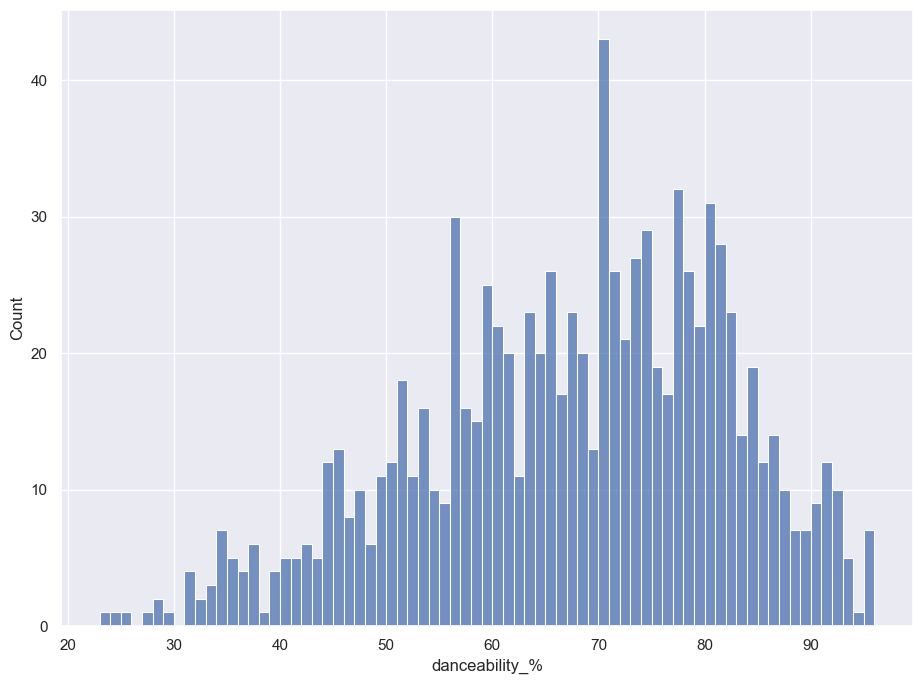

In [20]:
sns.histplot(data=df, x="danceability_%", binwidth=1)

In [21]:
df["danceability_%"].std()

14.631281889579846

Distribution of dancebility ratings across all of the songs. Seems to be a normal distribution with no outliers. Data centers well around the mean. Standard deviation is around 15 percent which gives the data moderate spread. However overal, it seems that danceability tends toward the mean. 

## Question 2: Do other streaming platforms charts rank songs similarly to Spotify?

<Axes: xlabel='in_spotify_charts', ylabel='in_apple_charts'>

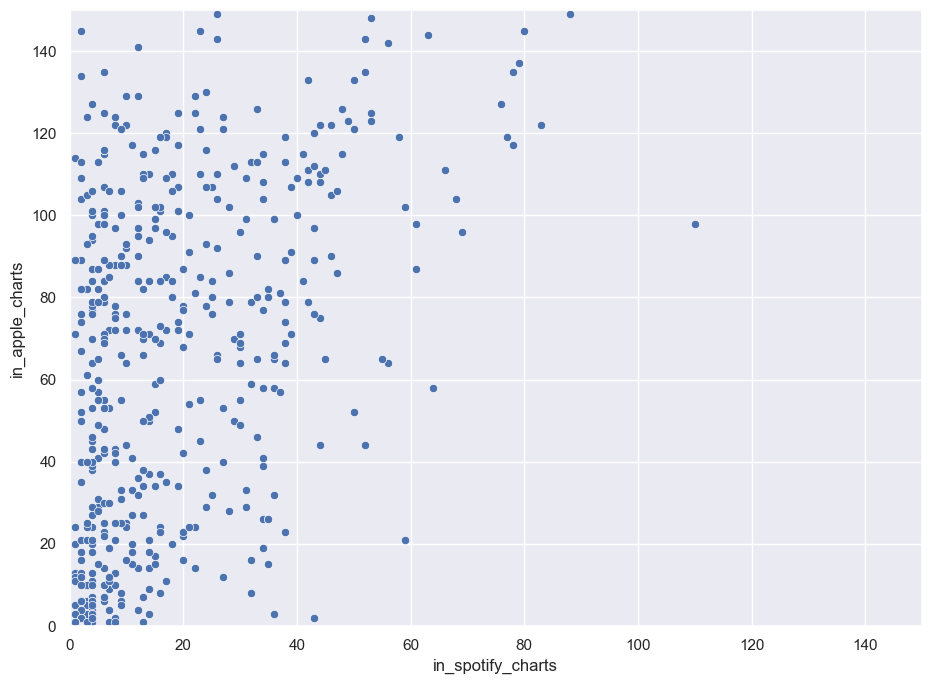

In [22]:
plt.ylim(0, 150)
plt.xlim(0, 150)
sns.scatterplot(data=df, x="in_spotify_charts", y="in_apple_charts")


Strange triangular shape when comapring apple and spotify charts. Essentially, songs that are top on spotify are not always top on apple but songs that are top on apple are often top on spotify.

<Axes: xlabel='in_spotify_charts', ylabel='in_shazam_charts'>

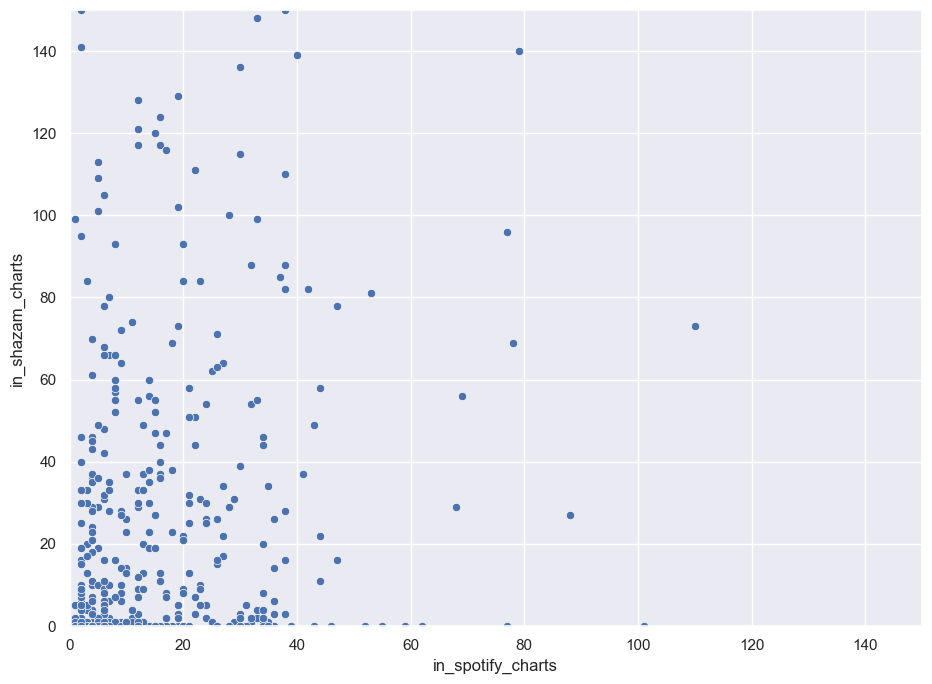

In [23]:
plt.ylim(0, 150)
plt.xlim(0, 150)
sns.scatterplot(data=df, x="in_spotify_charts", y="in_shazam_charts")

Seeing that there is a higher concentration of values near the origin, it would seem to be the case that spotify and shazam are pretty similar when it comes to songs that have been in the top 20 but there is still an element of randomness between the two platforms when you go further down the charts. 

## Question #3 Is there any correlation between total streams and chart ranking?

<Axes: xlabel='in_spotify_charts', ylabel='streams'>

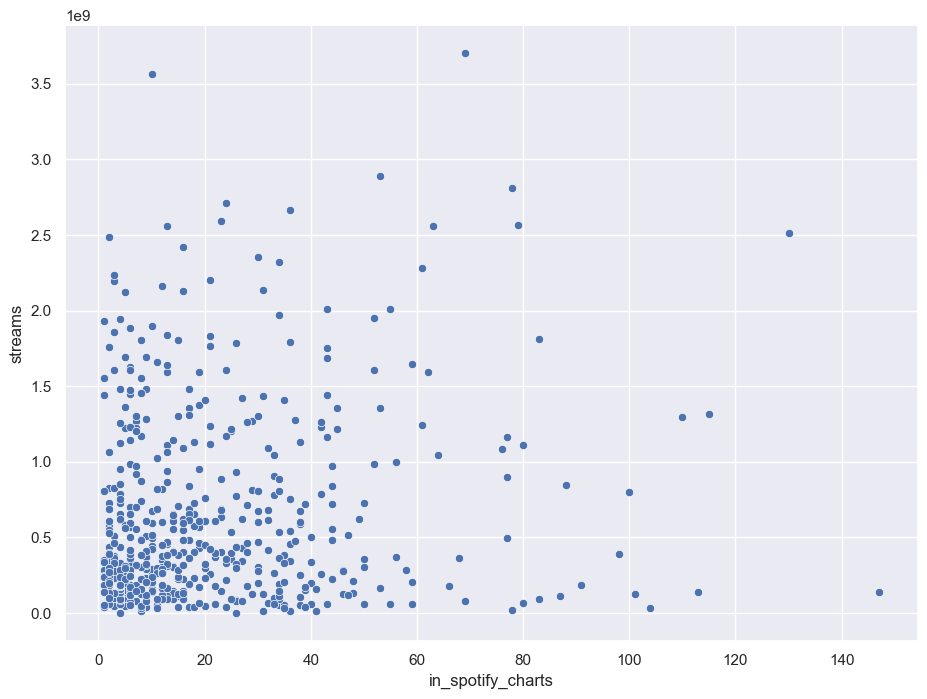

In [24]:
sns.scatterplot(data=df, x="in_spotify_charts", y="streams")

There seems to be little correlation here as even some songs that have very low amounts of total streams have been ranked very highly on the charts. This is similar to the findings I had in my EDA when viewing the distribution of total streams. 